# **CS 1810 Homework 4**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever you use to run your code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary but can help prevent any issues due to package versions.

**The following notebook is meant to help you work through Problem 2 on Homework 4. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**


In [103]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from seaborn import heatmap
from scipy.spatial import distance
from itertools import combinations
from scipy.spatial.distance import cdist

# Problem 1

Point: (-3, 30.0), Label: Class 1
Point: (-2, 0.0), Label: Class 1
Point: (-1, -2.0), Label: Class -1
Point: (0, 0.0), Label: Class 1
Point: (1, -2.0), Label: Class -1
Point: (2, 0.0), Label: Class 1
Point: (3, 30.0), Label: Class 1
[(-3, 30.0), (-2, 0.0), (-1, -2.0), (0, 0.0), (1, -2.0), (2, 0.0), (3, 30.0)]


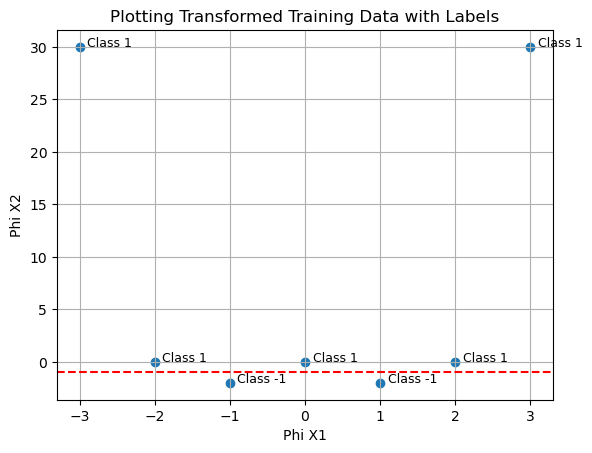

In [45]:
## Part 1: Plot the Transformed Training Data in R2

xy = [(-3,1),(-2,1),(-1,-1),(0,1),(1,-1),(2,1),(3,1)]

def phi(x):
    phi = (x,(-8/3*x**2)+(2/3*x**4))
    return phi

transform_x = []
class_labels = []

for x, y in xy:
    transform_x.append(phi(x))
    label = "Class -1" if y == -1 else "Class 1"
    class_labels.append(label)

# Display results
for point, label in zip(transform_x, class_labels):
    print(f"Point: {point}, Label: {label}")

print(transform_x)

x = [point[0] for point in transform_x]
y = [point[1] for point in transform_x]

plt.scatter(x, y)

for xi, yi, label in zip(x, y, class_labels):
    plt.text(xi + 0.1, yi, label, fontsize=9)

plt.title('Plotting Transformed Training Data with Labels')
plt.xlabel('Phi X1')
plt.ylabel('Phi X2')
plt.grid(True)
plt.axhline(y=-1, color='red', linestyle='--', label='Optimal Decision Boundary')
plt.show()


# Problem 2

In [66]:
# Loading datasets
small_dataset = np.load("data/small_dataset.npy")
small_labels = np.load("data/small_dataset_labels.npy").astype(int)
large_dataset = np.load("data/large_dataset.npy")

## K-Means

In [85]:
class KMeans(object):
    # K is the K in KMeans
    def __init__(self, K):
        self.K = K

    # function to assign labels to each point
    def assign_labels(self, X, centroids):
        """
        Assign each point in X to the nearest centroid
        """
        distance = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distance, axis=1)
        return labels
    
    def new_centroid(self, X, labels):
        """
        Recompute centroids as the mean of all points assigned to each centroid
        """
        centroids = np.array([X[labels == k].mean(axis=0) for k in range(self.K)])
        return centroids
    
    def rss(self, X, labels, centroids):
        """
        Compute the residual sum of squares (RSS) for the current clustering
        """
        rss = np.sum(np.linalg.norm(X - centroids[labels], axis=1) ** 2)
        return rss

    def fit(self, X):
        """
        Run the k-Means algorithm for exactly 10 iterations.

        :param X: a (N x 784) array since the dimension of each image is 28x28
        """
        N,D = X.shape
        centroids = X[np.random.choice(N, self.K, replace=False)]

        self.rss_list = []
        
        for i in range(10):
             labels = self.assign_labels(X, centroids)
             new_centroids = self.new_centroid(X, labels)
             rss = self.rss(X, labels, centroids)
             self.rss_list.append(rss)

             if np.allclose(centroids, new_centroids):
                break
             
             centroids = new_centroids  
        
        self.centroids = centroids  # Final centroids
        self.labels = labels  # Final labels (cluster assignments)
        return centroids, labels
    
        
    def plot_verify_objective(self):
        """
        This should plot the objective as a function of iteration and verify that it never increases.

        This assumes that fit() has already been called.
        """
        plt.plot(self.rss_list)
        plt.xlabel('Iteration')
        plt.ylabel('Residual Sum of Squares (RSS)')
        plt.title('K-Means Objective Function (RSS) Over Iterations')
        plt.show()

    def get_mean_images(self):
        """ 
        This should return the arrays for K images. Each image should represent the mean of each of the fitted clusters.
        """
        return self.centroids.reshape(self.K, 784)

    def get_cluster_sizes(self):
        return np.bincount(self.labels)

### Part 1

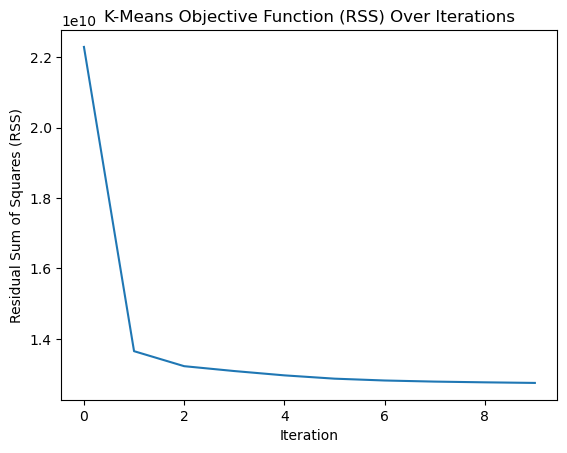

In [86]:
KMeansClassifier = KMeans(K=10)
KMeansClassifier.fit(large_dataset)
KMeansClassifier.plot_verify_objective()

### Code for plots in part 2 and 3

In [49]:
def make_mean_image_plot(data, standardized = False, filename=None):
    niters = 3
    K = 10
    allmeans = np.zeros((K, niters, 784))
    for i in range(niters):
        KMeansClassifier = KMeans(K=K)
        KMeansClassifier.fit(data)
        allmeans[:,i] = KMeansClassifier.get_mean_images()
    fig = plt.figure(figsize=(10,10))
    plt.suptitle('Class mean images across random restarts' + (' (standardized data)' if standardized else ''), fontsize=16)
    for k in range(K):
        for i in range(niters):
            ax = fig.add_subplot(K, niters, 1+niters*k+i)
            plt.setp(ax.get_xticklabels(), visible=False)
            plt.setp(ax.get_yticklabels(), visible=False)
            ax.tick_params(axis='both', which='both', length=0)
            if k == 0: plt.title('Iter '+str(i))
            if i == 0: ax.set_ylabel('Class '+str(k), rotation=90)
            plt.imshow(allmeans[k,i].reshape(28,28), cmap='Greys_r')
    plt.show()

### Part 2

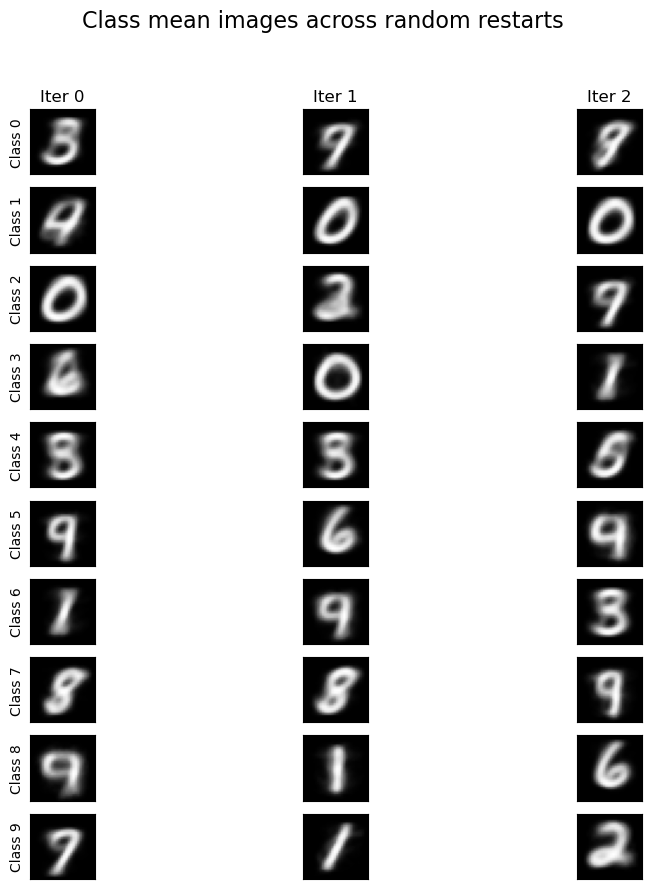

In [50]:
make_mean_image_plot(large_dataset)

### Part 3

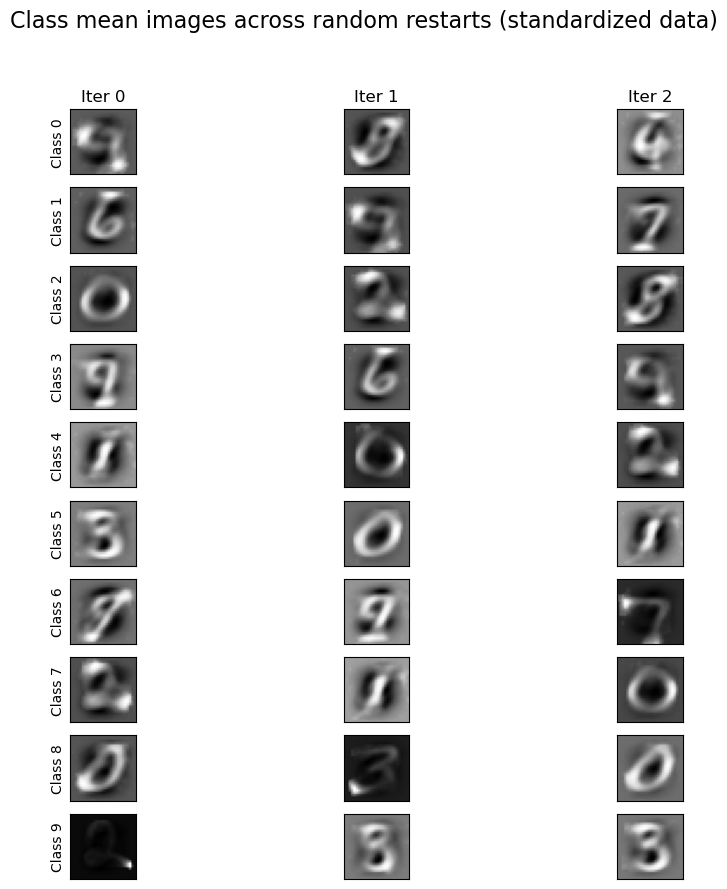

In [51]:
# Standardize the dataset: zero mean, unit variance
mean = np.mean(large_dataset, axis=0)
std = np.std(large_dataset, axis=0)
std[std == 0] = 1  # Avoid division by zero

large_dataset_std = (large_dataset - mean) / std


make_mean_image_plot(large_dataset_std, standardized = True, filename='p2.3.png')

## HAC: Part 4


In [109]:
class HAC(object):
    def __init__(self, linkage):
        self.linkage = linkage
        self.history = {}  # store clusterings by number of clusters

    def calc_distance(self, c1, c2):
        if self.linkage == 'max':
            return np.max(cdist(c1, c2))
        elif self.linkage == 'min':
            return np.min(cdist(c1, c2))
        elif self.linkage == 'centroid':
            centroid1 = np.mean(c1, axis=0, keepdims=True)
            centroid2 = np.mean(c2, axis=0, keepdims=True)
            return np.linalg.norm(centroid1 - centroid2)
        else:
            raise ValueError("Linkage must be 'min', 'max', or 'centroid'.")

    def fit(self, X):
        self.X = X.astype(np.float64)
        N = len(X)
        self.clusters = [[i] for i in range(N)]
        self.history[N] = copy.deepcopy(self.clusters)

        while len(self.clusters) > 1:
            min_dist = float('inf')
            merge_pair = (None, None)

            for i in range(len(self.clusters)):
                for j in range(i + 1, len(self.clusters)):
                    c1 = self.X[self.clusters[i]]
                    c2 = self.X[self.clusters[j]]
                    dist = self.calc_distance(c1, c2)
                    if dist < min_dist:
                        min_dist = dist
                        merge_pair = (i, j)

            i, j = merge_pair
            new_cluster = self.clusters[i] + self.clusters[j]

            # remove j then i (j > i ensures correct pop order)
            self.clusters.pop(j)
            self.clusters.pop(i)
            self.clusters.append(new_cluster)

            self.history[len(self.clusters)] = copy.deepcopy(self.clusters)

    def get_k_clusters(self, K):
        if K not in self.history:
            raise ValueError(f"No clustering for K={K}. Did you fit the model first?")
        clusters = self.history[K]
        labels = np.zeros(len(self.X), dtype=int)
        for idx, cluster in enumerate(clusters):
            for i in cluster:
                labels[i] = idx
        return labels

    def get_mean_images(self, K):
        clusters = self.history[K]
        return np.array([
            np.mean(self.X[cluster], axis=0)
            for cluster in clusters
        ])

    def get_cluster_sizes(self, K):
        clusters = self.history[K]
        return [len(cluster) for cluster in clusters]


### Part 4: This takes ~6 minutes to run

Done: max
Done: min
Done: centroid


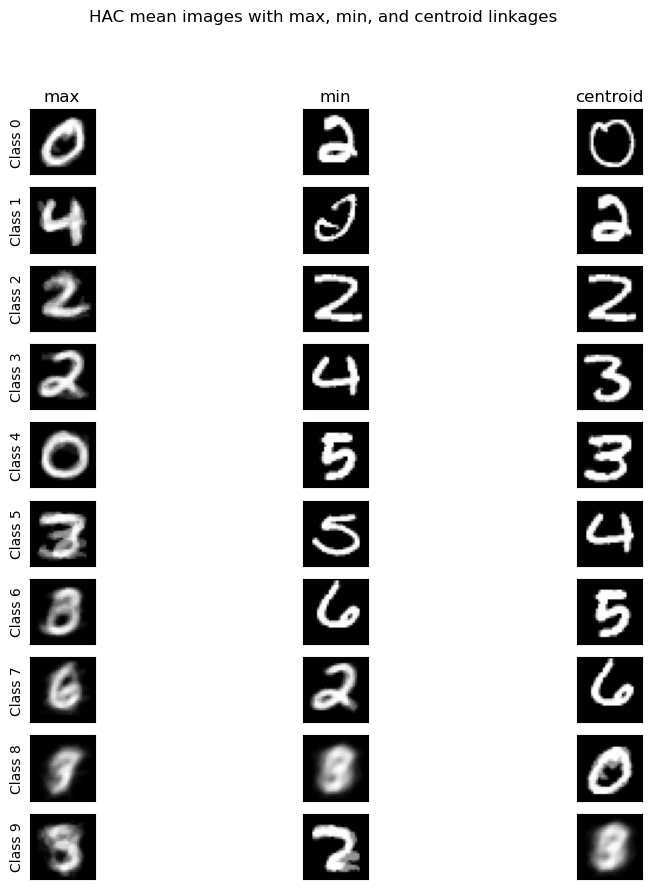

In [110]:
LINKAGES = [ 'max', 'min', 'centroid' ]
n_clusters = 10
cluster_sizes = []

fig = plt.figure(figsize=(10,10))
plt.suptitle("HAC mean images with max, min, and centroid linkages")
for l_idx, l in enumerate(LINKAGES):
    # Fit HAC
    hac = HAC(l)
    hac.fit(small_dataset)
    mean_images = hac.get_mean_images(n_clusters)
    cluster_sizes.append(hac.get_cluster_sizes(n_clusters)) # used in Part 8, append here to avoid re-fitting
    # Make plot
    for m_idx in range(mean_images.shape[0]):
        m = mean_images[m_idx]
        ax = fig.add_subplot(n_clusters, len(LINKAGES), l_idx + m_idx*len(LINKAGES) + 1)
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)
        if m_idx == 0: plt.title(l)
        if l_idx == 0: ax.set_ylabel('Class '+str(m_idx), rotation=90)
        plt.imshow(m.reshape(28,28), cmap='Greys_r')
    print("Done:", l)
# plt.savefig('img_output/p2.4.png') 
plt.show()

### Part 5:

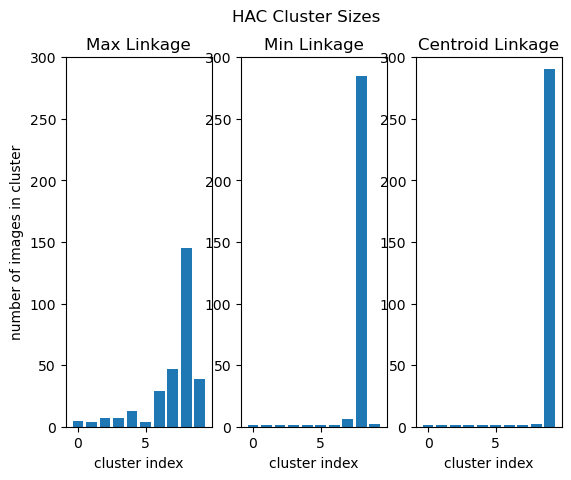

In [111]:
# HAC graphs
def plot_cluster_sizes(n_clusters, cluster_sizes, filename=None):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.suptitle("HAC Cluster Sizes")
    ax1.set_ylabel('number of images in cluster')
    cluster_idxs = [i for i in range(n_clusters)]

    def plot_sizes_per_linkage(ax, sizes, linkage):
        ax.bar(cluster_idxs, sizes)
        ax.set_title(f'{linkage} Linkage')
        ax.set_xlabel('cluster index')
        ax.set_ylim(0, 300)

    plot_sizes_per_linkage(ax1, cluster_sizes[0], 'Max')
    plot_sizes_per_linkage(ax2, cluster_sizes[1], 'Min')
    plot_sizes_per_linkage(ax3, cluster_sizes[2], 'Centroid')
    #if filename:
        #plt.savefig(f'img_output/{filename}') 
    plt.show()
plot_cluster_sizes(n_clusters, cluster_sizes, filename='p2.5a.png')

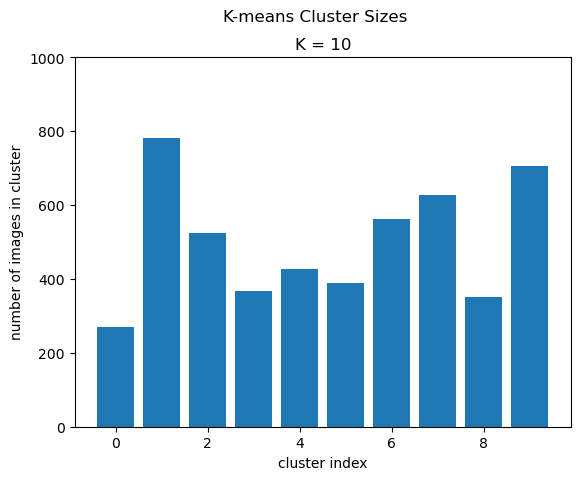

In [112]:
# K-means graphs
def plot_cluster_sizes(n_clusters, cluster_sizes, filename=None):
    fig, (ax) = plt.subplots(1, 1)
    fig.suptitle("K-means Cluster Sizes")
    ax.set_ylabel('number of images in cluster')
    cluster_idxs = [i for i in range(n_clusters)]

    def plot_sizes_per_linkage(ax, sizes, k):
        ax.bar(cluster_idxs, sizes)
        ax.set_title(f'K = {k}')
        ax.set_xlabel('cluster index')
        ax.set_ylim(0, 1000)

    plot_sizes_per_linkage(ax, cluster_sizes, str(n_clusters))
    #if filename:
        #plt.savefig(f'img_output/{filename}') 
    plt.show()

plot_cluster_sizes(KMeansClassifier.K, KMeansClassifier.get_cluster_sizes(), filename='p2.5b.png')

### Part 6: Confusion Matrix

In [120]:
def confusion_matrix(labels_A, labels_B, n_clusters=10):
    confusion = np.zeros((n_clusters, n_clusters), dtype=int)
    for a, b in zip(labels_A, labels_B):
        confusion[b, a] += 1
    return confusion

In [121]:
kmeans = KMeans(K=10)
kmeans.fit(small_dataset)
labels_kmeans = kmeans.assignments

hac_min = HAC(linkage="min")
hac_min.fit(small_dataset)
labels_hac_min = hac_min.get_k_clusters(10)

hac_max = HAC(linkage="max")
hac_max.fit(small_dataset)
labels_hac_max = hac_max.get_k_clusters(10)

hac_centroid = HAC(linkage="centroid")
hac_centroid.fit(small_dataset)
labels_hac_centroid = hac_centroid.get_k_clusters(10)

methods = [
    ("K-means", labels_kmeans),
    ("HAC min", labels_hac_min),
    ("HAC max", labels_hac_max),
    ("HAC centroid", labels_hac_centroid)
]

pairs = list(combinations(methods, 2))

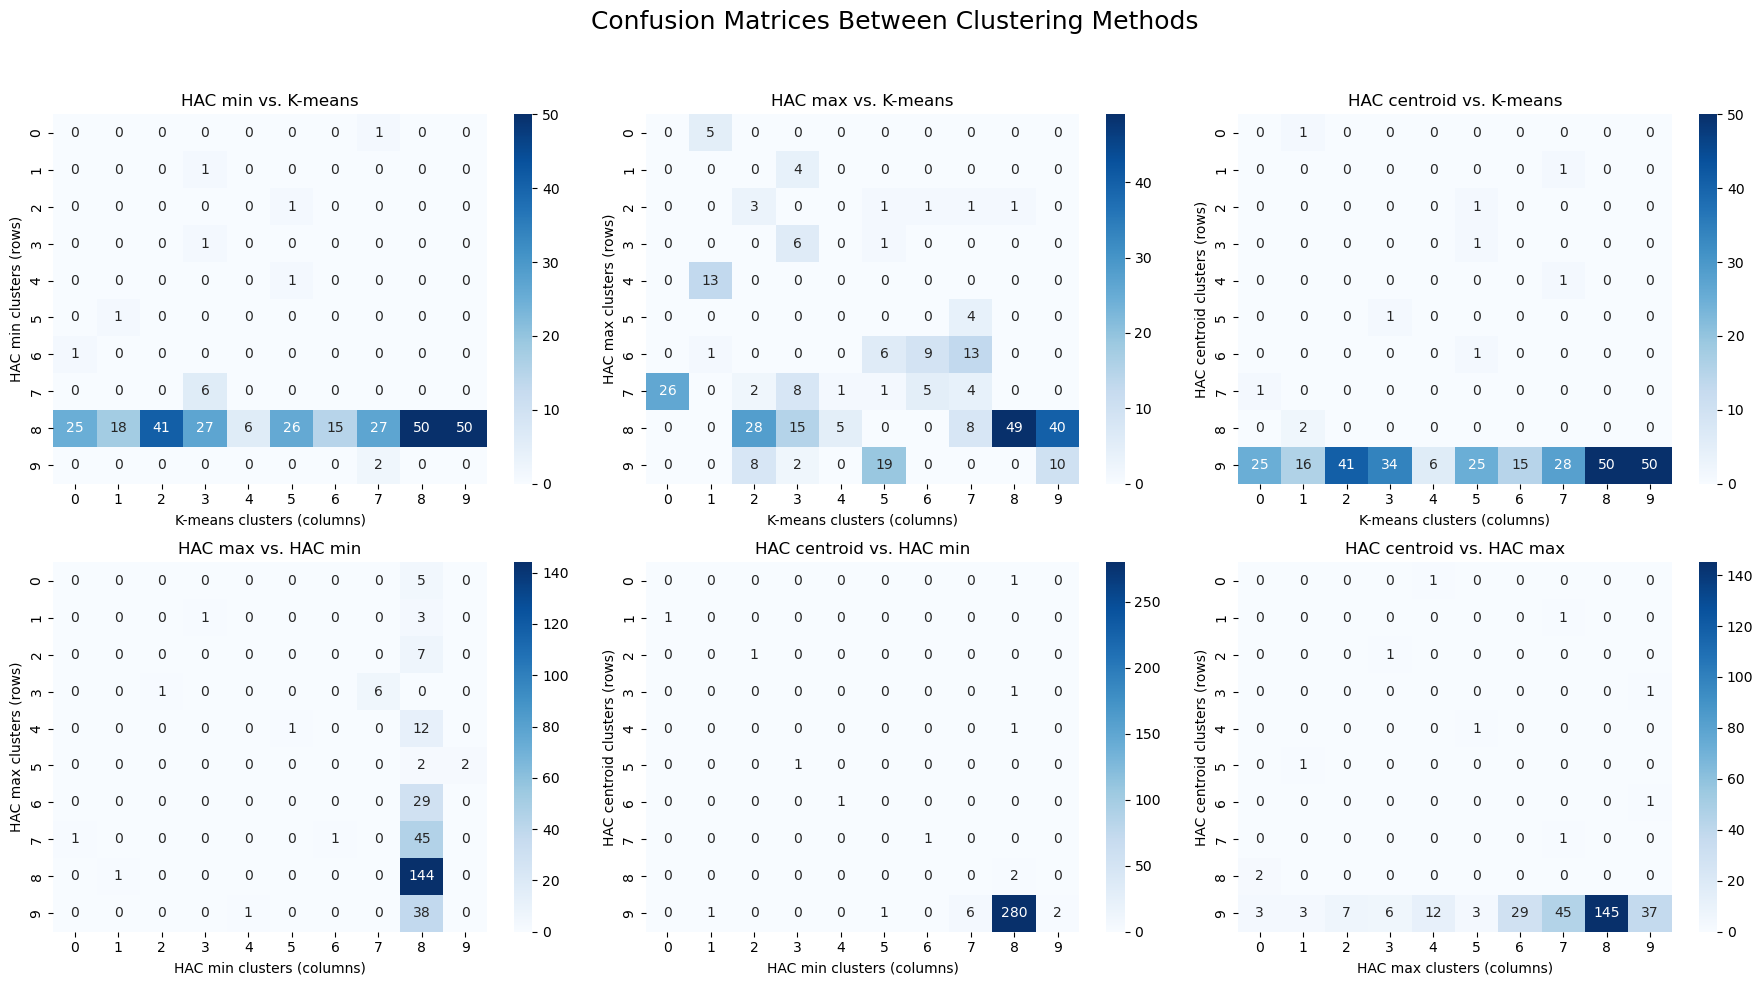

In [124]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Confusion Matrices Between Clustering Methods", fontsize=18)

for ax, ((name_A, labels_A), (name_B, labels_B)) in zip(axes.flatten(), pairs):
    cm = confusion_matrix(labels_A, labels_B, n_clusters=10)
    heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel(f"{name_A} clusters (columns)")
    ax.set_ylabel(f"{name_B} clusters (rows)")
    ax.set_title(f"{name_B} vs. {name_A}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()